In [5]:
import pandas as pd
import numpy as np

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Questions
1. Find the mean of old scheme and new scheme column. (5 points)
2. Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (8 points)
3. What conclusion does the test (p-value) lead to? (2 points)


In [16]:
df=pd.read_csv("C:/Somduity/Python/Residency2_statistics.csv")

In [17]:
df[["Old Scheme (in thousands)","New Scheme (in thousands)"]].describe()

,Old Scheme (in thousands),New Scheme (in thousands)
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


In [18]:
df["Old Scheme (in thousands)"].mean()

68.03333333333333

In [19]:
df["New Scheme (in thousands)"].mean()

72.03333333333333

In [20]:
import matplotlib.pyplot as plot
%matplotlib inline


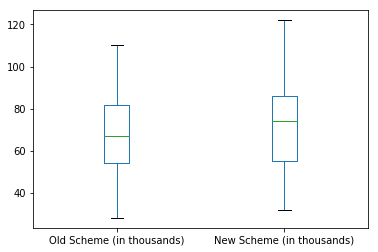

In [21]:
df[["Old Scheme (in thousands)","New Scheme (in thousands)"]].plot(kind='box')

Statistics=0.940, p=0.089


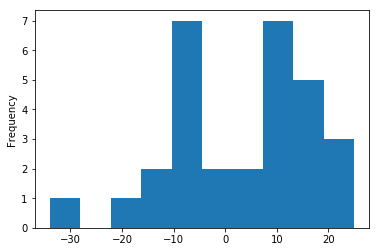

In [48]:
#H0- Normal districbution
#H1-Not Nornmal Distribution

df.diff=df["New Scheme (in thousands)"]-df["Old Scheme (in thousands)"]
from scipy.stats import shapiro
stat,p=shapiro(df.diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))

df.diff.plot(kind='hist')

#p>0.05 Accept Null--Normal Distribution


In [49]:
#H0- No significant Difference
#H1-Significant Difference

from scipy.stats import ttest_rel
two_sample = ttest_rel(df["New Scheme (in thousands)"],df["Old Scheme (in thousands)"])
two_sample

Ttest_relResult(statistic=1.5559143823544377, pvalue=0.13057553961337662)

In [50]:
import scipy
diff_1s_ttest_pValue = scipy.stats.ttest_1samp(df.diff, 0)
print("t Test:", diff_1s_ttest_pValue)

t Test: Ttest_1sampResult(statistic=1.5559143823544377, pvalue=0.13057553961337662)


In [51]:
#Conclusion: p>0.05 . Hence accept null - No significant difference

4. Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
        a) The probability of a type 1 error? (2 points)
        b) What is the p- value of the hypothesis test if we test for a difference of $5000? (8 points)
        c) Power of the test (5 points)



In [56]:
from scipy import stats
from scipy.stats import t

In [57]:
tstat=stats.t.ppf(0.05,29)
print(tstat)

-1.6991270265334977


In [64]:
#H0: Diff between two means <5
#H1: Diff between two means =5
from math import sqrt
std_diff=(df.diff.std())/sqrt(30)
print(std_diff)
x=df.diff.mean()
print(x)
z=(5-x)/std_diff
print(z)
pvalue=stats.norm.cdf(z)
print (pvalue)

2.570835545556901
4.0
0.3889785955886094
0.6513540098877996


In [68]:
b=5+(1.699*std_diff)
print (b)
z=b-4/(std_diff)
print(z)
#power of hypothesis
print(stats.norm.cdf(z))

9.367849591901177
7.811935209546739
0.9999999999999972
